In [1]:
#Define client's name

com_name = 'flyin2'

In [2]:
#Import libraries

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the input file

df = pd.read_csv("rfmTable_"+com_name+".csv", sep = "\t", parse_dates = ['date'])

In [4]:
df['frequency'].mean()

2.985279349138753

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157330 entries, 0 to 157329
Data columns (total 6 columns):
id                157330 non-null object
recency           157330 non-null float64
frequency         157330 non-null int64
monetary_value    157330 non-null float64
date              157330 non-null datetime64[ns, UTC]
weekday           157330 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(1)
memory usage: 7.2+ MB


In [6]:
df.head()

,id,recency,frequency,monetary_value,date,weekday
0,0,129.0,131,247860.0,2019-02-03 20:10:59.434000+00:00,101
1,0000015c-0b9f-c0b0-9a6e-9ae8ab2c243c,392.0,1,1021.0,2018-05-16 02:19:45+00:00,1
2,0000015c-0bc1-71bd-8c06-eeaf2ab6acb4,161.0,4,1607.0,2019-01-02 07:00:33.159000+00:00,4
3,0000015c-0bcd-42c7-8fbd-dc89fa565dcd,414.0,1,3515.0,2018-04-24 23:26:41+00:00,1
4,0000015c-0be9-295b-9345-ec764b98ba1c,398.0,2,3648.0,2018-05-10 20:23:43+00:00,2


In [7]:
sum(df['frequency'])

469674

In [8]:
#Make a copy for safety

dataset = df 

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157330 entries, 0 to 157329
Data columns (total 6 columns):
id                157330 non-null object
recency           157330 non-null float64
frequency         157330 non-null int64
monetary_value    157330 non-null float64
date              157330 non-null datetime64[ns, UTC]
weekday           157330 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(1)
memory usage: 7.2+ MB


In [10]:
#x = ['15985.0', '3268.0']
#dataset = dataset[~dataset['id'].isin(x)]

In [11]:
#Drop the all columns other than Recency, Frequency and Monetary_Value 

dataset = dataset.drop(['id'], axis = 1)

In [12]:
dataset = dataset.drop(['date'], axis = 1)

In [13]:
dataset = dataset.drop(['weekday'], axis = 1)

In [14]:
#dataset = dataset.drop(['R_div', 'M_div', 'F_div'], axis = 1)

In [15]:
#dataset = dataset.drop(['clusters'], axis = 1)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157330 entries, 0 to 157329
Data columns (total 3 columns):
recency           157330 non-null float64
frequency         157330 non-null int64
monetary_value    157330 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.6 MB


In [17]:
# Standardize the data attributes for the dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing

dataset = pd.DataFrame(preprocessing.scale(dataset))

/Users/gautamshetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [18]:
#Rename the attributes

dataset.rename(columns = {0 : 'recency',
                         1 : 'frequency',
                         2 : 'monetary_value'}, inplace = True)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157330 entries, 0 to 157329
Data columns (total 3 columns):
recency           157330 non-null float64
frequency         157330 non-null float64
monetary_value    157330 non-null float64
dtypes: float64(3)
memory usage: 3.6 MB


In [20]:
#dataset['frequency'] = np.log(dataset['frequency'])


In [21]:
#dataset.loc[dataset['monetary_value']>0 ,'monetary_value'] = np.power((dataset.loc[dataset['monetary_value']>0 ,'monetary_value']),-.5)

In [22]:
#plt.hist(dataset['monetary_value'], bins = 100)

In [23]:
#sum(np.abs(dataset['monetary_value']-dataset['monetary_value'].mean()) > (30*dataset['monetary_value'].std()))

In [24]:
dataset.shape[0]

157330

In [25]:
#Finding out the optimal value of K by elbow method

distortions = []
for k in range(1,16):
    kmeanModel = KMeans(n_clusters=k).fit(dataset)
    kmeanModel.fit(dataset)
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])

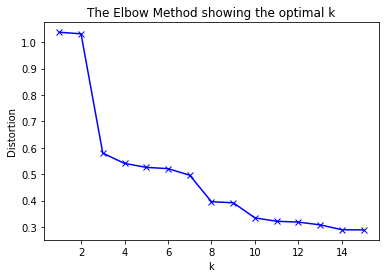

In [26]:
K = range(1,16)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

10


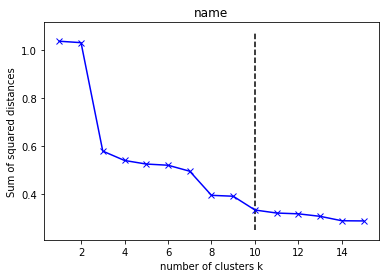

In [27]:
# Plot and save the graph of the elbow method for reporting purpose

from kneed import KneeLocator
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
print(kn.knee)


import matplotlib.pyplot as plt
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.title('name')
plt.plot(K, distortions, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [28]:
#Create KMeans model using the optimal K value

kmeanModel = KMeans(n_clusters=kn.knee).fit(dataset)
kmeanModel.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
#test basis in case you want to use other k value

kmeanModel = KMeans(n_clusters=11).fit(dataset)
kmeanModel.fit(dataset)

In [29]:
#Paste the cluster_id for the corresponding id

dataset['clusters'] = kmeanModel.labels_  

In [30]:
df['clusters'] = dataset['clusters']

In [31]:
dataset.head(20)

,recency,frequency,monetary_value,clusters
0,-0.542911,16.891610,0.063980,2
1,1.568308,-0.261959,-0.012742,1
2,-0.286033,0.133893,-0.012560,7
3,1.744911,-0.261959,-0.011967,1
4,1.616472,-0.130008,-0.011926,1
5,0.950194,-0.261959,-0.012648,1
6,0.829782,0.133893,-0.003821,5
7,-0.382362,-0.261959,-0.012842,7
8,1.110743,-0.130008,-0.012805,1
9,0.420382,-0.261959,-0.012199,5


In [32]:
#Count the number of customers in each clusters

count = []
for i in range(kn.knee):
    count.append(sum(kmeanModel.labels_ ==i))

In [33]:
count

[44625, 41846, 419, 11, 27, 35484, 4116, 30799, 1, 2]

In [34]:
#Make the cluster report

Cluster_report = pd.DataFrame()

In [35]:
for c in  kmeanModel.cluster_centers_:
    for d in c:
        print("%.5f"%d)
    print(" ")    


-1.23699
-0.07305
-0.00557
 
1.21807
-0.12544
-0.00982
 
-1.09376
9.73007
0.04878
 
-0.62829
0.64970
92.52052
 
-1.13575
35.39401
0.35133
 
0.52285
-0.10709
-0.00943
 
-0.70491
2.53138
0.01063
 
-0.35814
-0.11013
-0.01074
 
-1.42593
0.26584
233.18421
 
-1.55437
122.78191
0.44102
 


In [36]:
centers = []
for c in  kmeanModel.cluster_centers_:
    temp = []
    for d in c:
        temp.append(d)
    centers.append(temp)   


In [37]:
clusters_report = pd.DataFrame(centers)

In [38]:
clusters_report = clusters_report.rename(columns={0: "Recency", 1: "Frequency", 2: "Monetary_value"})

In [39]:
clusters_report['count'] = count

In [40]:
clusters_report

,Recency,Frequency,Monetary_value,count
0,-1.236986,-0.073052,-0.005575,44625
1,1.218074,-0.125438,-0.009819,41846
2,-1.093759,9.730066,0.048777,419
3,-0.628294,0.649700,92.520525,11
4,-1.135753,35.394006,0.351334,27
5,0.522847,-0.107091,-0.009429,35484
6,-0.704910,2.531379,0.010626,4116
7,-0.358143,-0.110130,-0.010743,30799
8,-1.425931,0.265843,233.184205,1
9,-1.554370,122.781907,0.441022,2


In [41]:
#Converting the standardized values back to normal for all the attributes

clusters_report['Recency'] = clusters_report['Recency']*np.std(df['recency'])+df['recency'].mean()

In [42]:
clusters_report['Frequency'] = clusters_report['Frequency']*np.std(df['frequency'])+df['frequency'].mean()

In [43]:
clusters_report['Monetary_value'] = clusters_report['Monetary_value']*np.std(df['monetary_value'])+df['monetary_value'].mean()

In [44]:
#Round the clusters report

clusters_report = clusters_report.round(0)

In [45]:
clusters_report['total revenue'] = clusters_report['Monetary_value']*clusters_report['count']

In [60]:
#Save the clusters report for reporting

clusters_report.to_csv("clusters_report_"+com_name+".csv", sep='\t', encoding='utf-8')

In [46]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [47]:
clusters_report.sort_values(by=['total revenue'])

,Recency,Frequency,Monetary_value,count,total revenue
9,3.00,934.00,1460910.00,2,2921820.00
4,55.00,271.00,1172357.00,27,31653639.00
2,60.00,77.00,198947.00,419,83358793.00
7,152.00,2.00,7454.00,30799,229575746.00
6,109.00,22.00,76202.00,4116,313647432.00
5,262.00,2.00,11680.00,35484,414453120.00
1,348.00,2.00,10427.00,41846,436328242.00
8,19.00,5.00,750260715.00,1,750260715.00
0,43.00,2.00,24082.00,44625,1074659250.00
3,118.00,8.00,297706379.00,11,3274770169.00


In [48]:
#(df.loc[df['clusters']==8, 'monetary_value']-df['monetary_value'].mean())/np.std(df['monetary_value'])

In [52]:
df['weekend'] = df['frequency']-df['weekday']

In [53]:
temp = df.groupby('clusters').agg({'weekday': lambda x:x.sum(),
                                   'weekend': lambda x:x.sum()})          

In [54]:
temp

,weekday,weekend
clusters,,
0,82084,26426
1,61876,23221
2,24944,7204
3,76,11
4,5794,1529
5,59160,18004
6,70185,21065
7,50602,15621
8,5,0


In [56]:
result = pd.merge(clusters_report, temp,left_index=True, right_index=True)

In [57]:
result

,Recency,Frequency,Monetary_value,count,total revenue,weekday,weekend
0,43.00,2.00,24082.00,44625,1074659250.00,82084,26426
1,348.00,2.00,10427.00,41846,436328242.00,61876,23221
2,60.00,77.00,198947.00,419,83358793.00,24944,7204
3,118.00,8.00,297706379.00,11,3274770169.00,76,11
4,55.00,271.00,1172357.00,27,31653639.00,5794,1529
5,262.00,2.00,11680.00,35484,414453120.00,59160,18004
6,109.00,22.00,76202.00,4116,313647432.00,70185,21065
7,152.00,2.00,7454.00,30799,229575746.00,50602,15621
8,19.00,5.00,750260715.00,1,750260715.00,5,0
9,3.00,934.00,1460910.00,2,2921820.00,1588,279


In [58]:
result.iloc[0]['Frequency']*result.iloc[0]['count']

89250.0

In [59]:
result.iloc[0]['weekday']+result.iloc[0]['weekend']

108510.0

In [49]:
df.iloc[0]['date']

Timestamp('2019-02-03 20:10:59.434000+0000', tz='UTC')

In [ ]:
import datetime
day = []
for i in df.index:
    day.append(df.iloc[i]['date'].strftime('%A'))

In [ ]:
len(day
   )

In [ ]:
df['day'] = day

In [ ]:
df.to_csv("rfm_table_clusterized_"+com_name+".csv", sep='\t', encoding='utf-8')

In [ ]:
df.head()

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekdays = []
for i in range(kn.knee):
    weekdays.append(sum((df['clusters'] ==i) & (df['day'].isin(days) )))

In [ ]:
days = ['Saturday', 'Sunday']
weekends = []
for i in range(kn.knee):
    weekends.append(sum((df['clusters'] ==i) & (df['day'].isin(days) )))

In [ ]:
weekdays

In [ ]:
weekends

In [ ]:
count

In [ ]:
clusters_report['weekdays_count'] = weekdays

In [ ]:
clusters_report['weekends_count'] = weekends

In [ ]:
check = pd.read_csv("flyin_book_room_checkin_checkout_dates.csv")

In [ ]:
check.info()

In [ ]:
ad_c['id'] = ad_c[ad_c['cuid'].isnull()]['luid']
ad_c.loc[ad_c['id'].isnull(), 'id'] = ad_c.loc[ad_c['id'].isnull(), 'cuid']

In [ ]:
ad_c.drop(['cuid', 'luid'], axis=1, inplace=True)

In [ ]:
sum(ad_c['Revenue'].isnull())

In [ ]:
dir(kmeanModel)

In [ ]:
kmeanModel.verbose

In [ ]:
kmeanModel.cluster_centers_

In [ ]:
kmeanModel.get_params

In [ ]:
kmeanModel.inertia_

In [ ]:
kmeanModel.labels_

In [ ]:
kmeanModel.random_state

In [ ]:
kmeanModel.n_iter_

In [ ]:
kmeanModel.n_clusters

In [ ]:
kmeanModel.score

In [ ]:
#libraries
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
 
# Change color
squarify.plot(sizes=count, label=["group A", "group B", "group C", "group D", "group E", "group F", "group G", "group H", "group I"], color=["red","green","blue", "grey", "cyan", "magenta", "black", "white", "yellow"], alpha=.4 )
plt.axis('off')
plt.show()


In [ ]:
for i in range(kn.knee): 
    plt.hist(df.loc[df['clusters']==i ,'recency'], bins=50, bottom = 5)
    print(i)
    plt.title(label = 'Cluster '+str(i))
    plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# qualtities plotted
# squarre area is the town surface area (superf)
# color scale is the town population in 2011 (p11_pop)

# read data from csv file
# data from CAPP opendata http://opendata.agglo-pau.fr/index.php/fiche?idQ=27
#df = pd.read_excel("Customer Success New.xlsx")
#df = df.set_index("location_id")
#df = df[["user_id", "company_id"]]
#df2 = df.sort_values(by="user_id", ascending=False)

# treemap parameters
x = 0.
y = 0.
width = 200.
height = 100.
cmap = matplotlib.cm.viridis

# color scale on the population
# min and max values without Pau
mini, maxi = clusters_report['count'].min(), clusters_report['count'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in clusters_report['count']]
colors[1] = "#FBFCFE"

# labels for squares
#labels = ["hab" % (label) for label in zip(df2.index, df2.user_id), df2.company_id)]
#labels[11] = "MAZERES" % (df2["user_id"]["MAZERES-LEZONS"], df2["company_id"]["MAZERES-LEZONS"])

# make plot
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Cluster Distribution", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(clusters_report['count'],label = range(kn.knee), color=colors, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])



plt.show()

In [ ]:
clusters_report.iloc[[3, 4]]['count']

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# qualtities plotted
# squarre area is the town surface area (superf)
# color scale is the town population in 2011 (p11_pop)

# read data from csv file
# data from CAPP opendata http://opendata.agglo-pau.fr/index.php/fiche?idQ=27
#df = pd.read_excel("Customer Success New.xlsx")
#df = df.set_index("location_id")
#df = df[["user_id", "company_id"]]
#df2 = df.sort_values(by="user_id", ascending=False)

# treemap parameters
x = 0.
y = 0.
width = 200.
height = 100.
cmap = matplotlib.cm.viridis

# color scale on the population
# min and max values without Pau
mini, maxi = clusters_report.iloc[[2, 3, 4]]['count'].min(), clusters_report.iloc[[2, 3, 4]]['count'].max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in clusters_report.iloc[[2, 3, 4]]['count']]
colors[1] = "#FBFCFE"

# labels for squares
#labels = ["hab" % (label) for label in zip(df2.index, df2.user_id), df2.company_id)]
#labels[11] = "MAZERES" % (df2["user_id"]["MAZERES-LEZONS"], df2["company_id"]["MAZERES-LEZONS"])

# make plot
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Cluster Distribution for 2, 3, 4 clusters", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(clusters_report.iloc[[2, 3, 4]]['count'],label = [2, 3, 4], color=colors, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])



plt.show()

In [ ]:
# color bar
# create dummy invisible image with a color map
img = plt.imshow([df2.p11_pop], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

fig.text(.76, .9, "Population", fontsize=14)
fig.text(.5, 0.1,
         "Superficie totale %d km2, Population de la CAPP : %d hab" % (df2.superf.sum(), df2.p11_pop.sum()),
         fontsize=14,
         ha="center")
fig.text(.5, 0.07,
         "Source : http://opendata.agglo-pau.fr/",
         fontsize=14,
         ha="center")

In [ ]:
df[df['clusters']==4]